In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [4]:
googleData = pd.read_csv("/content/GOOG.csv")
googleData.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-17,92.779999,92.970001,90.839996,92.160004,92.160004,22935800
1,2023-01-18,92.940002,93.587997,91.400002,91.779999,91.779999,19641600
2,2023-01-19,91.389999,94.400002,91.379997,93.910004,93.910004,28707700
3,2023-01-20,95.949997,99.419998,95.910004,99.279999,99.279999,53704800
4,2023-01-23,99.129997,101.400002,98.750000,101.209999,101.209999,31791800
5,2023-01-24,99.550003,101.089996,98.699997,99.209999,99.209999,27391400
6,2023-01-25,97.199997,97.720001,95.262001,96.730003,96.730003,31000900
7,2023-01-26,98.279999,99.209999,96.820000,99.160004,99.160004,24542100
8,2023-01-27,99.050003,101.580002,98.970001,100.709999,100.709999,29020400
9,2023-01-30,98.745003,99.408997,97.519997,97.949997,97.949997,24365100


In [5]:
googleData.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
googleData.corr()      #Correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.997539,0.997832,0.994551,0.994551,-0.396260
High,0.997539,1.000000,0.998001,0.997862,0.997862,-0.386874
Low,0.997832,0.998001,1.000000,0.998045,0.998045,-0.413146
Close,0.994551,0.997862,0.998045,1.000000,1.000000,-0.404005
Adj Close,0.994551,0.997862,0.998045,1.000000,1.000000,-0.404005
Volume,-0.396260,-0.386874,-0.413146,-0.404005,-0.404005,1.000000


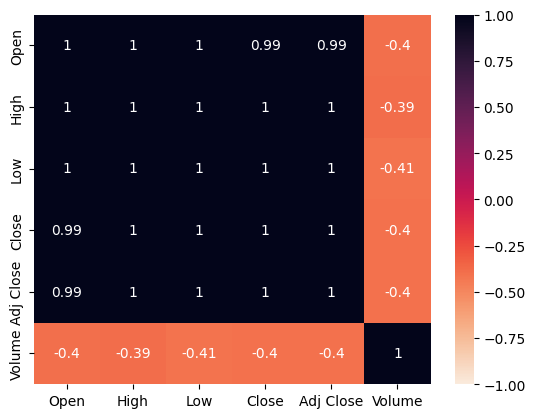

In [7]:
sns.heatmap(googleData.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

In [8]:
googleData.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
googleData.head(20)

,Date,Open,High,Low,Close
0,2023-01-17,92.779999,92.970001,90.839996,92.160004
1,2023-01-18,92.940002,93.587997,91.400002,91.779999
2,2023-01-19,91.389999,94.400002,91.379997,93.910004
3,2023-01-20,95.949997,99.419998,95.910004,99.279999
4,2023-01-23,99.129997,101.400002,98.750000,101.209999
5,2023-01-24,99.550003,101.089996,98.699997,99.209999
6,2023-01-25,97.199997,97.720001,95.262001,96.730003
7,2023-01-26,98.279999,99.209999,96.820000,99.160004
8,2023-01-27,99.050003,101.580002,98.970001,100.709999
9,2023-01-30,98.745003,99.408997,97.519997,97.949997


<Axes: >

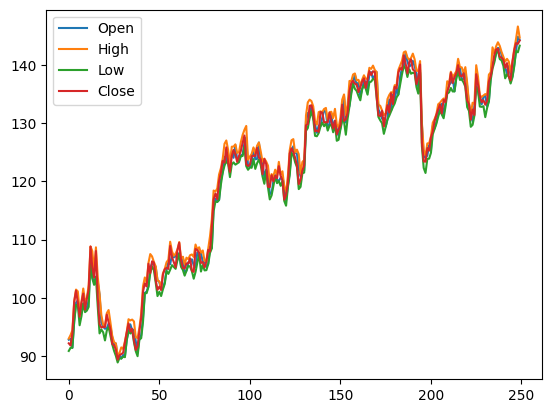

In [9]:
googleData.plot()

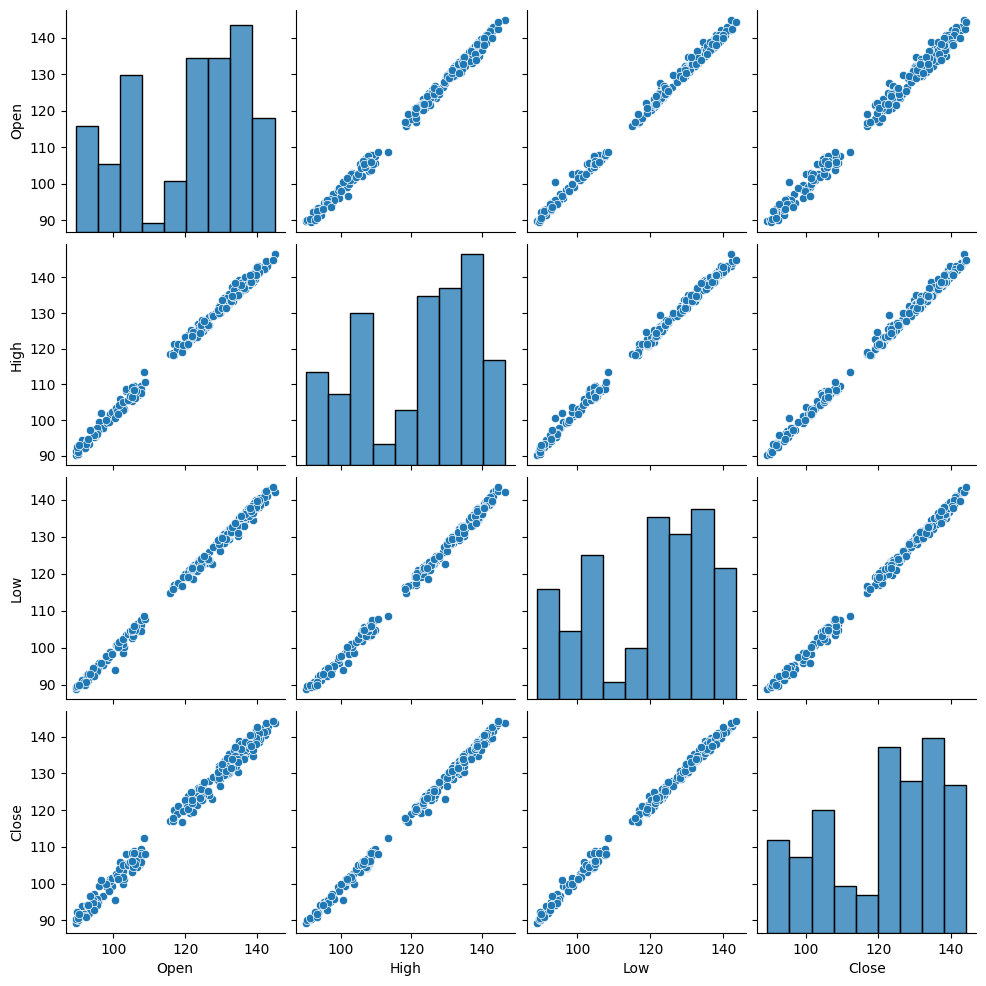

In [10]:
sns.pairplot(googleData)

In [11]:
# splitiing
x=googleData[['Open','High','Low']].values
y=googleData[['Close']].values
print (x)
print(y)

[[ 92.779999  92.970001  90.839996]
 [ 92.940002  93.587997  91.400002]
 [ 91.389999  94.400002  91.379997]
 [ 95.949997  99.419998  95.910004]
 [ 99.129997 101.400002  98.75    ]
 [ 99.550003 101.089996  98.699997]
 [ 97.199997  97.720001  95.262001]
 [ 98.279999  99.209999  96.82    ]
 [ 99.050003 101.580002  98.970001]
 [ 98.745003  99.408997  97.519997]
 [ 97.860001  99.910004  97.790001]
 [ 99.739998 102.190002  98.419998]
 [106.790001 108.82     106.540001]
 [103.510002 108.019997 103.300003]
 [102.684998 104.699997 102.209999]
 [103.629997 108.669998 103.547997]
 [102.690002 103.580002  98.455002]
 [100.540001 100.610001  93.860001]
 [ 95.739998  97.019997  94.529999]
 [ 95.010002  95.349998  94.050003]
 [ 94.660004  95.175003  92.650002]
 [ 94.739998  97.339996  94.360001]
 [ 95.540001  97.879997  94.970001]
 [ 95.07      95.75      93.449997]
 [ 93.239998  93.415001  92.      ]
 [ 91.933998  92.360001  90.870003]
 [ 92.129997  92.129997  90.010002]
 [ 89.629997  90.129997  88.

In [12]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [13]:
model=LinearRegression()          #create an instance of LinearRegression.
model.fit(x_train,y_train)

LinearRegression()

In [15]:
prediction = model.predict(x_test)
prediction

array([[138.77169069],
       [123.94292295],
       [123.55499667],
       [137.93177359],
       [131.96955681],
       [135.56389334],
       [125.59016391],
       [120.06870334],
       [105.34755667],
       [136.11041719],
       [137.97251937],
       [134.14992213],
       [122.19782665],
       [140.06256736],
       [122.55686715],
       [105.19175506],
       [131.06750925],
       [131.37802798],
       [131.16227102],
       [126.93574098],
       [136.403791  ],
       [106.22689443],
       [143.35465523],
       [118.66274407],
       [130.38684729],
       [123.90630827],
       [101.01764571],
       [104.90331597],
       [140.01323933],
       [ 91.79284282],
       [132.3094771 ],
       [105.8526789 ],
       [120.36340951],
       [131.29524458],
       [138.16807131],
       [128.66982309],
       [123.02936707],
       [100.15662718],
       [ 96.95873785],
       [123.41710368],
       [120.99300811],
       [108.23499738],
       [121.47180373],
       [133

In [16]:
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
comparison.head(20)

,Actual,Predicted
0,138.449997,138.771691
1,124.830002,123.942923
2,124.639999,123.554997
3,137.350006,137.931774
4,131.789993,131.969557
5,136.199997,135.563893
6,125.750000,125.590164
7,120.089996,120.068703
8,105.120003,105.347557
9,135.490005,136.110417


In [17]:
model.score(x_test, y_test)

0.9974487257927416